In [136]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from sklearn.feature_extraction.text import CountVectorizer


In [ ]:
nltk.download('punkt')

In [2]:
metadata = pd.read_csv('data/YelpZip/metadata', sep='\t',header=None)
metadata.columns = ['user_id', 'prod_id', 'rating', 'label', 'date']
metadata.sample(10)

,user_id,prod_id,rating,label,date
350506,183961,924,4.0,1,2014-05-15
511246,236530,2431,2.0,1,2013-10-29
424124,41293,1052,4.0,1,2013-03-08
585531,47899,2799,4.0,1,2011-08-27
112550,59503,1012,5.0,1,2011-05-24
118470,46522,1051,2.0,1,2013-07-20
70229,57062,615,4.0,1,2009-11-08
408694,153039,3493,5.0,1,2014-03-24
324071,5532,1526,4.0,1,2014-06-14
577302,256520,4800,1.0,1,2013-11-11


In [3]:
metadata.head()

,user_id,prod_id,rating,label,date
0,5044,0,1.0,-1,2014-11-16
1,5045,0,1.0,-1,2014-09-08
2,5046,0,3.0,-1,2013-10-06
3,5047,0,5.0,-1,2014-11-30
4,5048,0,5.0,-1,2014-08-28


In [4]:
productIdMapping = pd.read_csv('data/YelpZip/productIdMapping', sep='\t',header=None)
productIdMapping.columns = ['product_name', 'prod_id']
productIdMapping.sample(10)

,product_name,prod_id
4659,Golden Bread Bakeshop & Grill,4681
3827,Logan’s of Vermont,3193
260,Heavy Woods,270
3557,Ela,1591
1033,Diamonds In the Ruff,1834
1549,Banh Mi Saigon,4995
609,Deli Grocery,631
2825,Big Daddy’s,2878
24,John’s Deli,4270
4002,Seventy Seven Walnut,4044


In [9]:
reviewContent = pd.read_csv('data/YelpZip/reviewContent', sep='\t',header=None)
reviewContent.columns = ['user_id', 'prod_id', 'date', 'review_text']
reviewContent.sample(10)

,user_id,prod_id,date,review_text
45638,41463,395,2012-03-01,I would have liked to give this restaurant mor...
323072,174125,2829,2014-08-03,"The food is amazing, especially for the price!"
483095,125860,295,2012-12-03,Great place for Mexican food in Hartford. I ha...
109902,79428,973,2012-05-07,I was interested in trying this joint because ...
142102,97009,1307,2013-03-22,The empanadas beef were very good. Wings were ...
18039,21240,127,2010-04-21,The food was ok but the main issue was that th...
173038,111455,1541,2009-01-14,I was in nYC for a few days and I stayed with ...
588827,16896,4880,2012-03-25,I came here with my bro and his lady friend on...
195946,7000,1746,2013-01-24,So here's where all the vietnamese people are!...
430816,211382,3715,2013-04-04,"This place rocks!!!! Originally, we loved this..."


In [11]:
reviewGraph = pd.read_csv('data/YelpZip/reviewGraph', sep='\t',header=None)
reviewGraph.columns = ['user_id', 'prod_id', 'rating']
reviewGraph.sample(10)

,user_id,prod_id,rating
199965,34114,736,3.0
149779,100754,1348,5.0
585454,7871,2799,5.0
436739,54749,3745,4.0
257722,74842,2231,4.0
37713,35974,328,5.0
473608,10559,3913,2.0
381383,20783,2605,4.0
408194,203923,3491,5.0
195187,121526,1735,2.0


In [12]:
userIdMapping = pd.read_csv('data/YelpZip/userIdMapping', sep='\t',header=None)
userIdMapping.columns = ['user_code', 'user_id']
userIdMapping.sample(10)

,user_code,user_id
152125,Z6R6YiUT0GeDgkL7oJthzQ,51304
1894,qRB-woDgwCBRTYjqrQrzDw,251087
138261,OCiI9PQQ4JGIoVJ1KzNCjA,202486
4587,rlWsMMK-2I62apKSVABN5Q,204644
98697,6jCnRaKM3g3d9yNcp09RRw,244777
49110,DBbFGyO0SiLre0O_MmxBtg,112079
1608,WebwVarplYbLfpO_pwjVhw,197333
212105,yW1FkTWnkFLPQCvQADmj4Q,241136
242767,YTilvOW56B7arZuWD429UA,16133
252063,8NEqM-i6-d5gH99amvnk0w,182112


In [13]:
sample = reviewContent.sample(10)

In [14]:
punct_re = r'[^\s\w]'
sample['review_clean'] = sample['review_text'].str.lower().str.replace(punct_re,'')
sample['review_clean']

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


237155    this was so gross it took forever for delivery...
221264    my husband took me on a date to amis last mond...
528836    came here on a thursday night with a friend no...
9926      went here on a thursday night and had a really...
605170    a great meal gluten free options available for...
119839    one of my sisters friends was having her birth...
447022    a lot of places in nyc claim to serve very goo...
568533    love this place appetizers we ordered the spic...
284354    food is amazing service is amazing and the dri...
467102    taste like any other ramen restaurant in japan...
Name: review_clean, dtype: object

In [15]:
reviewContent.count()

user_id        608458
prod_id        608458
date           608458
review_text    608458
dtype: int64

In [30]:
data = (reviewGraph
        .merge(metadata, on=['user_id','prod_id','rating'])
        .merge(reviewContent,on=['user_id','prod_id','date'])
        .merge(productIdMapping, how='inner', on='prod_id'))
data['label'] = ((data['label']+1)/2).astype('int')
data.head()

,user_id,prod_id,rating,label,date,review_text,product_name
0,5044,0,1.0,0,2014-11-16,"Drinks were bad, the hot chocolate was watered...",Toast
1,5045,0,1.0,0,2014-09-08,This was the worst experience I've ever had a ...,Toast
2,5046,0,3.0,0,2013-10-06,This is located on the site of the old Spruce ...,Toast
3,5047,0,5.0,0,2014-11-30,I enjoyed coffee and breakfast twice at Toast ...,Toast
4,5048,0,5.0,0,2014-08-28,I love Toast! The food choices are fantastic -...,Toast


In [52]:
print('Number of observations:', data['label'].count())
print('Number of distinct products:', len(data['prod_id'].unique()))
print('Number of distinct users:', len(data['user_id'].unique()))

Number of observations: 608458
Number of distinct products: 5044
Number of distinct users: 260239
Benign ratio: 0.8677985990816128


In [49]:
print('Average rating of all reviews:', data['rating'].mean())
print('Average rating of filtered reviews:', data.loc[data['label']==0, 'rating'].mean())

Average rating of all reviews: 3.9235740182559846
Average rating of filtered reviews: 3.7824438394311217


In [41]:
punct_re = r'[^\s\w]'
data['review_clean'] = data['review_text'].str.lower().str.replace(punct_re,'')


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


0    drinks were bad the hot chocolate was watered ...
1    this was the worst experience ive ever had a c...
2    this is located on the site of the old spruce ...
3    i enjoyed coffee and breakfast twice at toast ...
4    i love toast the food choices are fantastic  i...
Name: review_clean, dtype: object

In [44]:
data['number_words'] = data['review_clean'].str.split('\s').str.len()

In [104]:
data[['rating','label','number_words']].describe().T

,count,mean,std,min,25%,50%,75%,max
rating,608458.0,3.923574,1.147515,1.0,3.0,4.0,5.0,5.0
label,608458.0,0.867799,0.338710,0.0,1.0,1.0,1.0,1.0
number_words,608458.0,117.573188,108.445684,1.0,45.0,87.0,155.0,5401.0


In [107]:
data.loc[data['label']==1, ['rating']].describe().T

,count,mean,std,min,25%,50%,75%,max
rating,528019.0,3.945074,1.094331,1.0,3.0,4.0,5.0,5.0


In [106]:
data.loc[data['label']==0, ['rating']].describe().T

,count,mean,std,min,25%,50%,75%,max
rating,80439.0,3.782444,1.441012,1.0,3.0,4.0,5.0,5.0


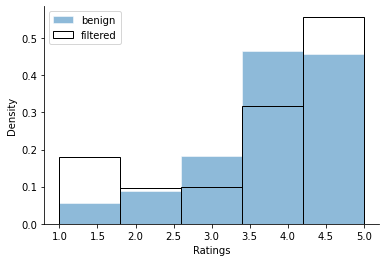

In [114]:
# plt.title('Distribution of ratings in the reviews')
plt.xlabel('Ratings')
plt.ylabel('Density')
plt.hist(data.loc[data['label']==1,'rating'], bins=5, ec='w', density=True, alpha=.5,label='benign')
plt.hist(data.loc[data['label']==0,'rating'], bins=5, fc='None',ec='k',density=True,label='filtered')
plt.legend()
sns.despine()
plt.savefig('fig/rating.pdf');

In [118]:
data.loc[data['label']==1, ['number_words']].describe().T

,count,mean,std,min,25%,50%,75%,max
number_words,528019.0,121.918158,109.976337,1.0,48.0,91.0,160.0,5401.0


In [116]:
data.loc[data['label']==0, ['number_words']].describe().T

,count,mean,std,min,25%,50%,75%,max
number_words,80439.0,89.051865,92.890171,1.0,31.0,62.0,114.0,1549.0


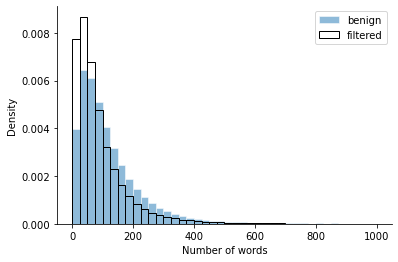

In [115]:
# plt.title('Distribution of number of words in the reviews')
plt.xlabel('Number of words')
plt.ylabel('Density')
plt.hist(data.loc[data['label']==1,'number_words'], range=(0,1000),bins=40,ec='w', density=True, alpha=.5,label='benign')
plt.hist(data.loc[data['label']==0,'number_words'], range=(0,1000),bins=40,fc='None',ec='k',density=True,label='filtered')
plt.legend()
sns.despine()
plt.savefig('fig/number_words.pdf');

In [ ]:
######################################################################
## Do not edit this block of code.
## This defines the classification class which
## loads the data and sets up the model.
######################################################################

class Classifier:

    def __init__(self, feature_method, L2_regularization_strength=1.0, min_feature_count=1):
        self.feature_vocab = {}
        self.feature_method = feature_method
        self.log_reg = None
        self.L2_regularization_strength=L2_regularization_strength
        self.min_feature_count=min_feature_count

        self.trainX, self.trainY, self.trainOrig = self.process(trainingFile, training=True)
        self.devX, self.devY, self.devOrig = self.process(evaluationFile, training=False)
        self.testX, _, self.testOrig = self.process(testFile, training=False)

    # Read data from file
    def load_data(self, filename):
        data = []
        with open(filename, encoding="utf8") as file:
            for line in file:
                cols = line.split("\t")
                idd = cols[0]
                label = cols[1]
                text = cols[2]

                data.append((idd, label, text))
                
        return data

    # Featurize entire dataset
    def featurize(self, data):
        featurized_data = []
        for idd, label, text in data:
            feats = self.feature_method(text)
            featurized_data.append((label, feats))
        return featurized_data

    # Read dataset and returned featurized representation as sparse matrix + label array
    def process(self, dataFile, training = False):
        original_data = self.load_data(dataFile)
        data = self.featurize(original_data)

        if training:
            fid = 0
            feature_doc_count = Counter()
            for label, feats in data:
                for feat in feats:
                    feature_doc_count[feat]+= 1

            for feat in feature_doc_count:
                if feature_doc_count[feat] >= self.min_feature_count:
                    self.feature_vocab[feat] = fid
                    fid += 1

        F = len(self.feature_vocab)
        D = len(data)
        X = sparse.dok_matrix((D, F))
        Y = [None]*D
        for idx, (label, feats) in enumerate(data):
            for feat in feats:
                if feat in self.feature_vocab:
                    X[idx, self.feature_vocab[feat]] = feats[feat]
            Y[idx] = label

        return X, Y, original_data

    def load_test(self, dataFile):
        data = self.load_data(dataFile)
        data = self.featurize(data)

        F = len(self.feature_vocab)
        D = len(data)
        X = sparse.dok_matrix((D, F))
        Y = [None]*D
        for idx, (data_id, feats) in enumerate(data):
            for feat in feats:
                if feat in self.feature_vocab:
                    X[idx, self.feature_vocab[feat]] = feats[feat]
            Y[idx] = data_id

        return X, Y

    # Train model and evaluate on held-out data
    def evaluate(self):
        (D,F) = self.trainX.shape
        self.log_reg = linear_model.LogisticRegression(C = self.L2_regularization_strength, max_iter=1000)
        self.log_reg.fit(self.trainX, self.trainY)
        training_accuracy = self.log_reg.score(self.trainX, self.trainY)
        development_accuracy = self.log_reg.score(self.devX, self.devY)
        print("Method: %s, Features: %s, Train accuracy: %.3f, Dev accuracy: %.3f" % (self.feature_method.__name__, F, training_accuracy, development_accuracy))


    # Predict labels for new data
    def predict(self):
        predX = self.log_reg.predict(self.testX)

        with open("%s_%s" % (self.feature_method.__name__, "predictions.csv"), "w", encoding="utf8") as out:
            writer=csv.writer(out)
            writer.writerow(["Id", "Expected"])
            for idx, data_id in enumerate(self.testX):
                writer.writerow([self.testOrig[idx][0], predX[idx]])
        out.close()


    def printWeights(self, n=10):

        reverse_vocab=[None]*len(self.log_reg.coef_[0])
        for k in self.feature_vocab:
            reverse_vocab[self.feature_vocab[k]]=k

        # binary
        if len(self.log_reg.classes_) == 2:
              weights=self.log_reg.coef_[0]

              cat=self.log_reg.classes_[1]
              for feature, weight in list(reversed(sorted(zip(reverse_vocab, weights), key = operator.itemgetter(1))))[:n]:
                  print("%s\t%.3f\t%s" % (cat, weight, feature))
              print()

              cat=self.log_reg.classes_[0]
              for feature, weight in list(sorted(zip(reverse_vocab, weights), key = operator.itemgetter(1)))[:n]:
                  print("%s\t%.3f\t%s" % (cat, weight, feature))
              print()

        # multiclass
        else:
          for i, cat in enumerate(self.log_reg.classes_):

              weights=self.log_reg.coef_[i]

              for feature, weight in list(reversed(sorted(zip(reverse_vocab, weights), key = operator.itemgetter(1))))[:n]:
                  print("%s\t%.3f\t%s" % (cat, weight, feature))
              print()

            

In [125]:
def bow(text):
    # Here the `feats` dict should contain the features -- the key should be the feature name, 
    # and the value is the feature value.  See `simple_featurize` for an example.
    
    feats = {}
    words = nltk.word_tokenize(text)

    for word in words:
        feats[word] = 1

    return feats

In [ ]:
def ngrams(text):
    # Here the `feats` dict should contain the features -- the key should be the feature name, 
    # and the value is the feature value.  See `simple_featurize` for an example.
    
    feats = {}
    feats["test"] = 1
    
    text = re.sub(r'[^\s\w]', '', text.strip()).lower()
    words = nltk.word_tokenize(text)
    
    bigrams = nltk.bigrams(words)
    trigrams = nltk.trigrams(words)
    fourgrams = nltk.ngrams(words, 4)
    
    for bigram in bigrams:
        feats[bigram] = 1
    for trigram in trigrams:
        feats[trigram] = 1
    for fourgram in fourgrams:
        feats[fourgram] = 1
    
    return feats

In [133]:
with open('vader_lexicon.txt', 'r') as f:
    vader = {}

    lines = f.readlines()

    for line in lines:
        word = line.strip().split('\t')[0]
        polarity = np.float(line.strip().split('\t')[1])
        vader[word] = polarity

with open('subjclueslen1-HLTEMNLP05.tff', 'r') as f:
    mpqa = {}

    lines = f.readlines()

    for line in lines:
        word = line.strip().split(' ')[2].split('=')[-1]
        sentiment = line.strip().split(' ')[-1].split('=')[-1]
        if sentiment in ['positive', 'negative']:
            mpqa[word] = sentiment

In [ ]:
def feature2(text):
    # Here the `feats` dict should contain the features -- the key should be the feature name, 
    # and the value is the feature value.  See `simple_featurize` for an example.
    
    feats = {}
    feats["test"]=1

    feats['polarity'] = 0

    feats['positive'] = 0
    feats['negative'] = 0

    text = re.sub(r'[^\s\w]', '', text.strip()).lower()
    words = nltk.word_tokenize(text)
        
    for word in words:
        if word in mpqa:
            feats[mpqa[word]] += 1
        if word in vader:
            feats['polarity'] += vader[word]

    return feats

In [137]:
vectorizer = CountVectorizer(ngram_range=(1, 2,3), min_df=2)

In [138]:
data['review_clean']

0         drinks were bad the hot chocolate was watered ...
1         this was the worst experience ive ever had a c...
2         this is located on the site of the old spruce ...
3         i enjoyed coffee and breakfast twice at toast ...
4         i love toast the food choices are fantastic  i...
                                ...                        
608453    when i first moved to the area i must say i wa...
608454    kind of pricey i guess i expected a ridiculous...
608455    stopped by this restaurant yesterday we just w...
608456    finally checked out the best subs in claremont...
608457    just got me some best subs and i gotta say im ...
Name: review_clean, Length: 608458, dtype: object

In [140]:
ngram_feature = vectorizer.fit_transform(data['review_clean']).toarray()

<608458x361997 sparse matrix of type '<class 'numpy.int64'>'
	with 45323719 stored elements in Compressed Sparse Row format>

In [141]:
sent = pd.read_csv('vader_lexicon.txt', sep='\t', header=None, index_col=0)
sent = sent[[1]].rename(columns={1:'polarity'})
sent.index.name = 'word'
sent.head()

,polarity
word,
$:,-1.5
%),-0.4
%-),-1.5
&-:,-0.4
&:,-0.7


In [142]:
tidy_format = data['review_clean'].str.split(expand=True).stack().reset_index(level=1)
tidy_format.columns = ['num', 'word']
tidy_format.index.name = None
tidy_format.head()

KeyboardInterrupt: 

In [ ]:
data['vader_sentiment'] = tidy_format.merge(sent, how='left', left_on='word', right_index=True) \

In [ ]:
data['vader_sentiment'].describe()

In [ ]:
# sent = pd.read_csv('vader_lexicon.txt', sep='\t', header=None, index_col=0)
# sent = sent[[1]].rename(columns={1:'polarity'})
# sent.index.name = 'word'
# sent.head()